In [237]:
%matplotlib notebook

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [239]:
pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48201")

[                                                     0  \
 0                           POPULATION (Census Bureau)   
 1         County Population «History» «Group Quarters»   
 2                                       Estimate 2020:   
 3                                       Estimate 2019:   
 4                                       Estimate 2018:   
 ..                                                 ...   
 152  County Agricultural Profile (USDA): «Census of...   
 153  State & County QuickFacts (Census Bureau): «Ha...   
 154  State & County Narrative Profiles (Census Bure...   
 155  County History (Handbook of Texas Online): «Ha...   
 156  Texas Almanac (Texas State Historical Associat...   
 
                                                      1  \
 0                           POPULATION (Census Bureau)   
 1         County Population «History» «Group Quarters»   
 2                                              4738253   
 3                                              470924

In [240]:
#houston and surrounding counties
#find the info useful to our research and merge into one data frame, including Harris county
# df_harris = pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48201")
# df_harris


In [241]:
df_fortbend = pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48157")

In [242]:
df_montegomery = pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48339")

In [243]:
df_trinity = pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48455")

In [244]:
df_galveston = pd.read_html("https://txcip.org/tac/census/profile.php?FIPS=48167")

In [245]:
url_fortbend="https://txcip.org/tac/census/profile.php?FIPS=48157"
url_montgomery="https://txcip.org/tac/census/profile.php?FIPS=48339"
url_trinity="https://txcip.org/tac/census/profile.php?FIPS=48455"
url_galveston="https://txcip.org/tac/census/profile.php?FIPS=48167"
url_harris="https://txcip.org/tac/census/profile.php?FIPS=48201"

#Income data per Census Bureau (2019m- only year available)
groupurl=[url_harris, url_fortbend, url_montgomery, url_trinity, url_galveston]
print(groupurl)

df_income_smry=pd.DataFrame([])
for url_i in groupurl:
    print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_income=df_demog[df_demog[0].str.contains('Income - 2019')]
    df_income_smry_temp=pd.DataFrame(df_income.pivot(index='County', columns=[0], values=[1]))
    df_income_smry=pd.concat([df_income_smry,df_income_smry_temp[1]])




['https://txcip.org/tac/census/profile.php?FIPS=48201', 'https://txcip.org/tac/census/profile.php?FIPS=48157', 'https://txcip.org/tac/census/profile.php?FIPS=48339', 'https://txcip.org/tac/census/profile.php?FIPS=48455', 'https://txcip.org/tac/census/profile.php?FIPS=48167']
https://txcip.org/tac/census/profile.php?FIPS=48201
https://txcip.org/tac/census/profile.php?FIPS=48157
https://txcip.org/tac/census/profile.php?FIPS=48339
https://txcip.org/tac/census/profile.php?FIPS=48455
https://txcip.org/tac/census/profile.php?FIPS=48167


In [246]:
#Income data per Census Bureau (2019) - final dataframe
df_income_smry.columns=["Median Household Income - 2019 (Census Bureau):","Per Capita Income - 2019 (BEA):","Total Personal Income - 2019 (BEA):"]
df_income_smry


,Median Household Income - 2019 (Census Bureau):,Per Capita Income - 2019 (BEA):,Total Personal Income - 2019 (BEA):
County,,,
HARRIS COUNTY,"$61,638","$60,002","$282,809,166,000"
FORT BEND COUNTY,"$101,361","$59,653","$48,419,712,000"
MONTGOMERY COUNTY,"$88,833","$63,424","$38,523,113,000"
TRINITY COUNTY,"$43,788","$36,062","$528,344,000"
GALVESTON COUNTY,"$73,214","$54,250","$18,561,154,000"


In [181]:
#Unemplyment data per county 
"Unemployment Rate - 2020"

df_unemploymt_smry=pd.DataFrame([])

for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_unemploy=df_demog[df_demog[0].str.contains('Rate - 2020')]
    df_unemploymt_smry_temp=pd.DataFrame(df_unemploy.pivot(index='County', columns=[0], values=[1]))
    df_unemploymt_smry=pd.concat([df_unemploymt_smry,df_unemploymt_smry_temp[1]])


In [208]:
df_unemploymt_smry.columns=["2020"]

In [209]:
#Unemplyment data per county 
"Unemployment Rate - 2019"

df_unemploymt19_smry=pd.DataFrame([])

for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_unemploy=df_demog[df_demog[0].str.contains('Rate - 2019')]
    df_unemploymt_smry_temp=pd.DataFrame(df_unemploy.pivot(index='County', columns=[0], values=[1]))
    df_unemploymt19_smry=pd.concat([df_unemploymt19_smry,df_unemploymt_smry_temp[1]])


In [210]:
df_unemploymt19_smry.columns=["2019"]

In [211]:
#Unemplyment data per county 
"Unemployment Rate - 2018"

df_unemploymt18_smry=pd.DataFrame([])

for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_unemploy=df_demog[df_demog[0].str.contains('Rate - 2018')]
    df_unemploymt_smry_temp=pd.DataFrame(df_unemploy.pivot(index='County', columns=[0], values=[1]))
    df_unemploymt18_smry=pd.concat([df_unemploymt18_smry,df_unemploymt_smry_temp[1]])




In [212]:
df_unemploymt18_smry.columns=["2018"]


In [213]:
# Merge the two DataFrames together based on the Dates they share
#Final Annual unemployment dataframe 2018-2020 per county
tot_unemploy_df = pd.merge(df_unemploymt18_smry, df_unemploymt19_smry, on="County")
# tot_unemploy_df
tot_unemploy_df=pd.merge(tot_unemploy_df,df_unemploymt_smry, on="County")
tot_unemploy_df

,2018,2019,2020
County,,,
HARRIS COUNTY,4.4,3.9,8.9
FORT BEND COUNTY,4.0,3.5,7.7
MONTGOMERY COUNTY,3.8,3.4,7.5
TRINITY COUNTY,5.2,4.8,8.1
GALVESTON COUNTY,4.7,4.0,8.7


<IPython.core.display.Javascript object>


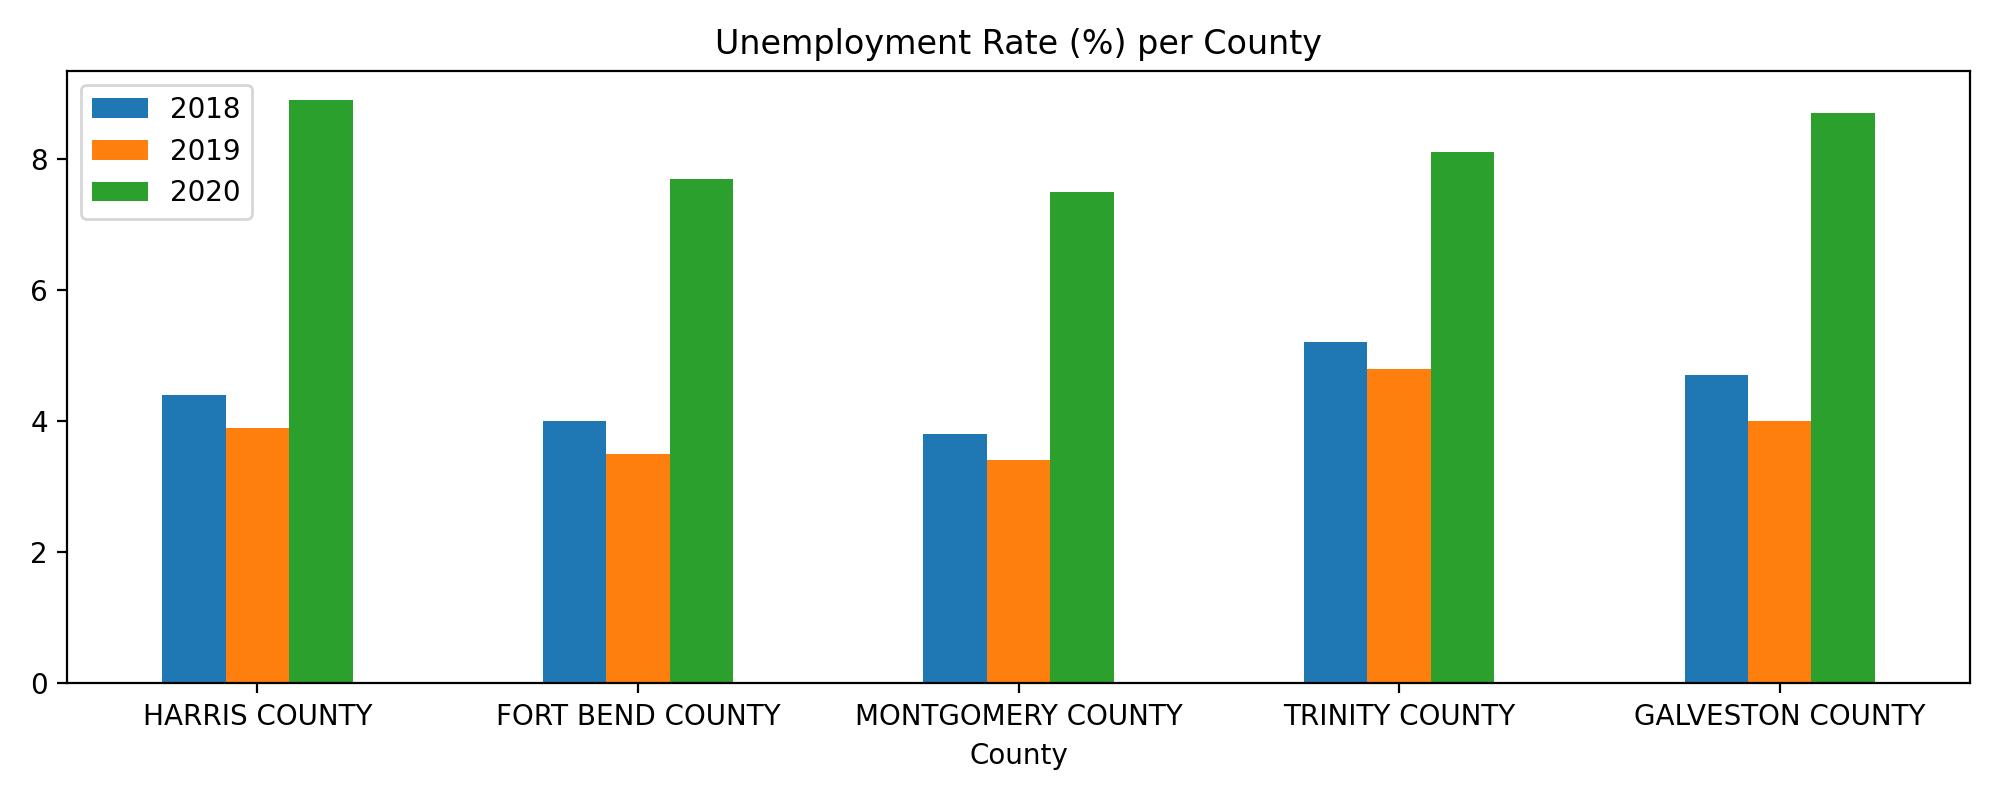

In [433]:
# pd.to_numeric(tot_unemploy_df['2018'])
# pd.to_numeric(tot_unemploy_df['2019'])
# pd.to_numeric(tot_unemploy_df['2020'])

tot_unemploy_df['2018'] = pd.to_numeric(tot_unemploy_df['2018'])
tot_unemploy_df['2019'] = pd.to_numeric(tot_unemploy_df['2019'])
tot_unemploy_df['2020'] = pd.to_numeric(tot_unemploy_df['2020'])


tot_unemploy_df.plot(y=["2018","2019","2020"], kind="bar",figsize=(10,4))
# tot_unemploy_df.set_ylabel("Unemployment Rate (%)")

plt.title("Unemployment Rate (%) per County")
plt.show()
plt.xticks(rotation='horizontal')
plt.tight_layout()



In [436]:
pyplot.savefig("figures/unemplyment_bar_char_per_county.png")

NameError: name 'pyplot' is not defined

In [358]:
#reset index for plotting purposes
# newindex_tot=tot_unemploy_df.reset_index()
# print(newindex_tot.dtypes)

# newindex_tot

In [260]:
tot_unemploy_df_new=pd.melt(tot_unemploy_df,ignore_index=False, var_name='Year', value_name='Unemployment Rate (%)')
reset_totalunemply=tot_unemploy_df_new.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
reset_totalunemply

#converted to csv for repo
reset_totalunemply.to_csv("summary_csv/reset_totalunemply.csv",index=False)

In [271]:
reset_totalunemply

,County,Year,Unemployment Rate (%)
0,HARRIS COUNTY,2018,4.4
1,FORT BEND COUNTY,2018,4.0
2,MONTGOMERY COUNTY,2018,3.8
3,TRINITY COUNTY,2018,5.2
4,GALVESTON COUNTY,2018,4.7
5,HARRIS COUNTY,2019,3.9
6,FORT BEND COUNTY,2019,3.5
7,MONTGOMERY COUNTY,2019,3.4
8,TRINITY COUNTY,2019,4.8
9,GALVESTON COUNTY,2019,4.0


In [193]:
#Estimated Population per Census Bureau (2018)
groupurl=[url_harris, url_fortbend, url_montgomery, url_trinity, url_galveston]
# print(groupurl)

tx_pop2018_smry=pd.DataFrame([])
for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_income=df_demog[df_demog[0].str.contains('Estimate 2018')]
    df_income_smry_temp=pd.DataFrame(df_income.pivot(index='County', columns=[0], values=[1]))
    tx_pop2018_smry=pd.concat([tx_pop2018_smry,df_income_smry_temp[1]])


In [219]:
tx_pop2018_smry.columns=["2018"]
tx_pop2018_smry

,2018
County,
HARRIS COUNTY,4676913
FORT BEND COUNTY,789269
MONTGOMERY COUNTY,590127
TRINITY COUNTY,14672
GALVESTON COUNTY,337639


In [189]:
#Estimated Population per Census Bureau (2019)
groupurl=[url_harris, url_fortbend, url_montgomery, url_trinity, url_galveston]
# print(groupurl)

tx_pop2019_smry=pd.DataFrame([])
for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_income=df_demog[df_demog[0].str.contains('Estimate 2019')]
    df_income_smry_temp=pd.DataFrame(df_income.pivot(index='County', columns=[0], values=[1]))
    tx_pop2019_smry=pd.concat([tx_pop2019_smry,df_income_smry_temp[1]])


In [220]:
tx_pop2019_smry.columns=["2019"]
tx_pop2019_smry

,2019
County,
HARRIS COUNTY,4709243
FORT BEND COUNTY,812737
MONTGOMERY COUNTY,607583
TRINITY COUNTY,14675
GALVESTON COUNTY,341541


In [221]:
#Estimated Population per Census Bureau (2020)
groupurl=[url_harris, url_fortbend, url_montgomery, url_trinity, url_galveston]
# print(groupurl)

tx_pop2020_smry=pd.DataFrame([])
for url_i in groupurl:
#     print(url_i)
    demog=pd.read_html(url_i)
    df_demog=demog[0]
    df_county_name=df_demog[df_demog[0].str.contains('POPULATION OF')]
    str1=str(df_county_name[0]).split("POPULATION OF PLACES IN ")[1]
    str2=str(str1).split(" - ")
    df_demog=demog[0]
    df_demog['County']=str2[0]
    df_income=df_demog[df_demog[0].str.contains('Estimate 2019')]
    df_income_smry_temp=pd.DataFrame(df_income.pivot(index='County', columns=[0], values=[1]))
    tx_pop2020_smry=pd.concat([tx_pop2020_smry,df_income_smry_temp[1]])


In [222]:
tx_pop2020_smry.columns=["2020"]
tx_pop2020_smry

,2020
County,
HARRIS COUNTY,4709243
FORT BEND COUNTY,812737
MONTGOMERY COUNTY,607583
TRINITY COUNTY,14675
GALVESTON COUNTY,341541


In [224]:
# Merge the two DataFrames together based on the Dates they share
#Final Annual population dataframe 2018-2020 per county
tot_pop_df = pd.merge(tx_pop2018_smry, tx_pop2019_smry, on="County")
tot_pop_df=pd.merge(tot_pop_df,tx_pop2020_smry, on="County")
tot_pop_df

,2018,2019,2020
County,,,
HARRIS COUNTY,4676913,4709243,4709243
FORT BEND COUNTY,789269,812737,812737
MONTGOMERY COUNTY,590127,607583,607583
TRINITY COUNTY,14672,14675,14675
GALVESTON COUNTY,337639,341541,341541


<IPython.core.display.Javascript object>


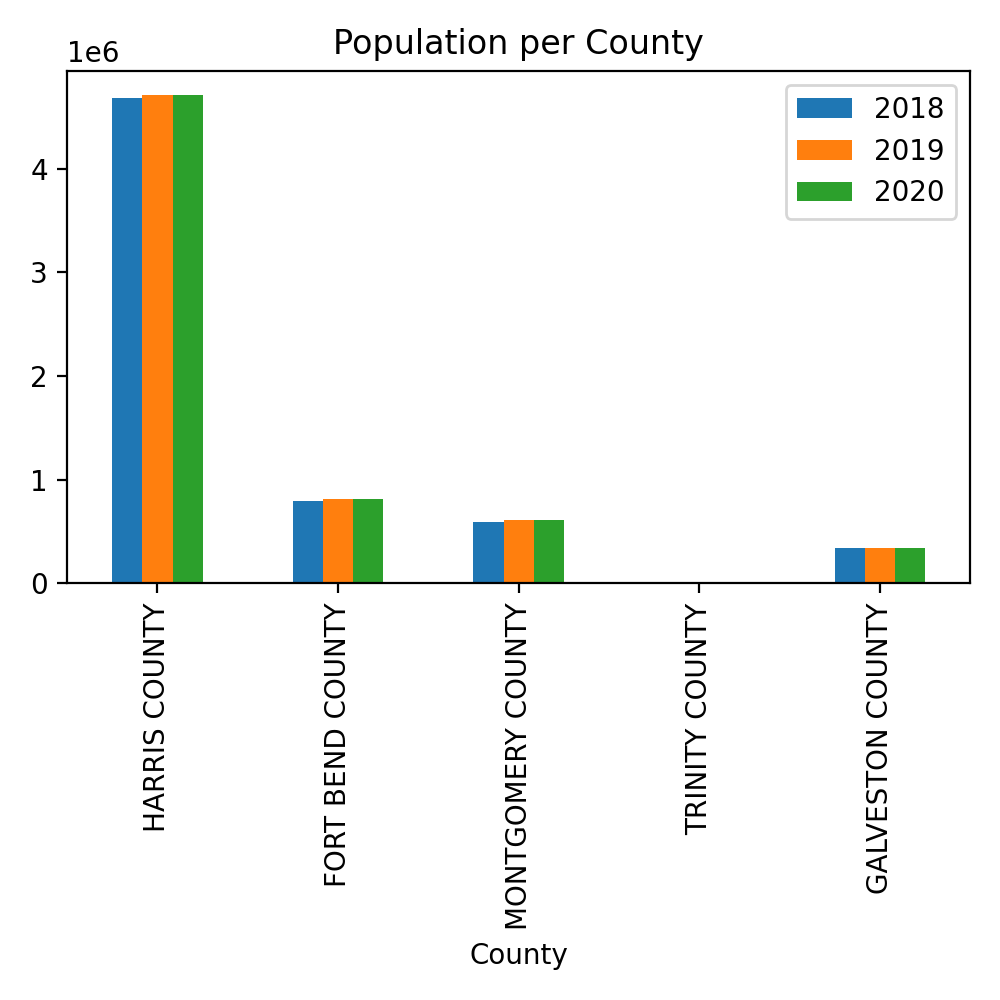

In [392]:

tot_pop_df['2018'] = pd.to_numeric(tot_pop_df['2018'])
tot_pop_df['2019'] = pd.to_numeric(tot_pop_df['2019'])
tot_pop_df['2020'] = pd.to_numeric(tot_pop_df['2020'])


tot_pop_df.plot(y=["2018","2019","2020"], kind="bar",figsize=(5,5))


plt.title("Population per County")
plt.show()
plt.tight_layout()

In [234]:
#transposed population df
#converted to csv
tot_pop_df_new=pd.melt(tot_pop_df,ignore_index=False, var_name='Year', value_name='Estimated Population')
reset_totalpop=tot_pop_df_new.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
reset_totalpop

reset_totalpop.to_csv("summary_csv/reset_totalpop.csv",index=False)


In [229]:
# #filtered state/county data clean df
# txpop_unfiltered=state_county_data_clean[(state_county_data_clean['County']=='Harris' )|(state_county_data_clean['County']=='Trinity')|(state_county_data_clean['County']=='Trinity')|(state_county_data_clean['County']=='Montgomery')|(state_county_data_clean['County']=='Galveston')|(state_county_data_clean['County']=='Fort Bend')]
# clean_txpop2019=txpop_unfiltered[txpop_unfiltered['State']=='Texas']
# clean_txpop2019

In [230]:
# #population estimate as of July 2020
# pop_est_2020=pd.read_html("https://txcip.org/tac/census/morecountyinfo.php?MORE=1044")
# pop_est_2020=pop_est_2020[0]

# pop_est_2020.rename(columns=pop_est_2020.iloc[0]).drop(pop_est_2020.index[0], inplace=True)
# cleanpop_est_2020=pop_est_2020[(pop_est_2020[0]=='Harris' )|(pop_est_2020[0]=='Trinity')|(pop_est_2020[0]=='Trinity')|(pop_est_2020[0]=='Montgomery')|(pop_est_2020[0]=='Galveston')|(pop_est_2020[0]=='Fort Bend')]

# cleanpop_est_2020


In [231]:
# # The population as of July 1, 2019 as estimated by the United States Census Bureau
# #same as wiki source above

# pop=pd.read_html("https://www.texas-demographics.com/counties_by_population")
# pop=pd.DataFrame(pop[0]).drop('Rank', axis=1)
# pop['County']=pop['County'].str.upper()
# pop

In [232]:
# #population estimate as of July 2019
# txdem_unfiltered=pop[(pop['County']=='Harris' )|(pop['County']=='Trinity')|(pop['County']=='Trinity')|(pop['County']=='Montgomery')|(pop['County']=='Galveston')|(pop['County']=='Fort Bend')]
# clean_txpop2019